# Desafío 1: Determinantes del ingreso
# Nombre: Jorge Hoffmann

# Hito 1 - Preliminares y aspectos computacionales

## Introducción al problema
El problema se enmarca en un análisis socionómico realizado por un organismo no gubernamental, que está interesado en distintas dinámicas socioeconómecias, tales como pobreza y desigualdad.

En concreto, se busca analizar la probabilidad de que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales. Esto con una base de atributos sociodemográficos.  

## Descripción de las variables
El vector objetivo es una variable categórica que nos indique si el individuo gana sobre 50.000 o bajo. Así, se deberá modelar la probabilidad de pertenecer a uno u otro grupo con un modelo de clasificación.

En cuanto a los atributos, estos son demográficas. Se incluyen algunas propias del individuo como:
- Edad
- Sexo
- Raza
- País de origen

Así como otras más relacionadas con la actualidad de la persona, tal como:
- workclass
- education
- Capital gains y Capital losses
- Estado marital
- Ocupación
- Horas trabajadas por semana
- etc.

Los distintos atributos serán puestos a prueba dentro del modelo, buscando concluir cuáles tienen mayor efecto sobre la clasificación de ingreso. Ya sea >50k o <=50k.

Observación: existe un atributo llamado 'fnlwgt'. A priori, no será utilizado ya que guarda relación con cómo transformar la data de la muestra a una data poblacional. Para efectos de nuestros modelos, esto no será necesario.

## Métricas de evaluación
Dado que estamos frente a un problema de clasificación, las métricas a utilizar deben ser las relacionadas con este tópico, tales como: recall, precision, F1. Esta última será la que se mirará con mayor atención ya que es un indicador que solo es bueno si hay buen recall y precision. Todos estos indicadores son referentes al modelo de machine learning.

Además, para comparar los modelos con enfoque econométrico, podremos utilizar log verosimilitud.

## Librerías a utilizar
A continuación, se comentarán librerías a utilizar. Podrían haber adicionales, pero estas son las principales.
- <strong>Pandas</strong> para contar con los dataframe
- <strong>Numpy</strong> para realizar cálculos
- <strong>matplotlib.pyplot</strong> para graficar
- <strong>seaborn</strong> para graficar
- <strong>de sklearn.metrics classification_report</strong> para poder revisar los indicadores recall, F1 y precision (propios de clasificación)
- <strong>de sklearn.metrics ConfusionMatrixDisplay</strong> para visualizar la matriz de confusión (propia de clasificación)
- <strong>statsmodels.formula.api</strong> para realizar regresiones en el marco econométrico (con logit para clasificación)
- <strong>de sklearn.linear_model LogisticRegression</strong> para generar regresiones logísticas desde el machine learning 
- <strong>de sklearn.model_selection train_test_split</strong> para separar la data en train y test
- <strong>missingno</strong> para la inspección visual de valores nulos

## Recodificación y operacionalización
En cuanto a este ítem, existen sugerencias de cómo recodificar algunas de las variables. Estas serán tomadas, puesto que nos permitirán disminuir el número de clases en distintos atributos categóricos. Por ejemplo, occupation se reduciría a solo 3 clases.  

Este será el punto de partida. A posteriori, se deberán recodificar todas las variables de tipo object, de modo que sean int. En ese caso, se usará Binary encoding cada vez que no exista una jerarquía clara dentro de las clases de la columna (ejemplo: raza o región). En cambio, cuando sí exista jerarquía entre las clases (ejemplo: educación), se puede utilizar Label encoding. 

Cabe destacar que al avanzar en el análisis es posible que se utilice otra recodificación, agrupando por ejemplo clases de una columna. 

Además de todo lo anterior, también se deberá analizar qué hacer con los valores perdidos. A priori, estos deberían ser excluidos. Sin embargo, según el volumen de estos, se podría definir atributo a atributo.

# Hito 2 - Descripción
Inicialmente, cargaremos la data y haremos todos los import correspondientes. Esto incluye nuestro archivo de funciones auxiliares y un archivo que contiene diccionarios para realizar la recodificación sugerida.

In [1]:
import Funciones as f_aux
import diccionarios_reemplazos as d_aux #Diccionarios que me sirven para recodificar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import train_test_split
import missingno as msn

# Seteamos para ignorar Warnings y no ensuciar el código por advertencias
import warnings
warnings.filterwarnings(action='ignore')

# Seteamos estilo dado que estoy con un tema oscuro
plt.style.use('seaborn')

# Leemos el df
df = pd.read_csv('income-db.csv')#.drop(columns = ['Unnamed: 0'])
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Limpieza de cosas extrañas y estandarización de los np.nan

Se importa correctamente el archivo. Al hacer head() es evidente que los datos presentan casos extraños. En particular, datos que son '?' cuando debiensen ser np.nan. A continuación, se analiza la matriz de datos perdidos.

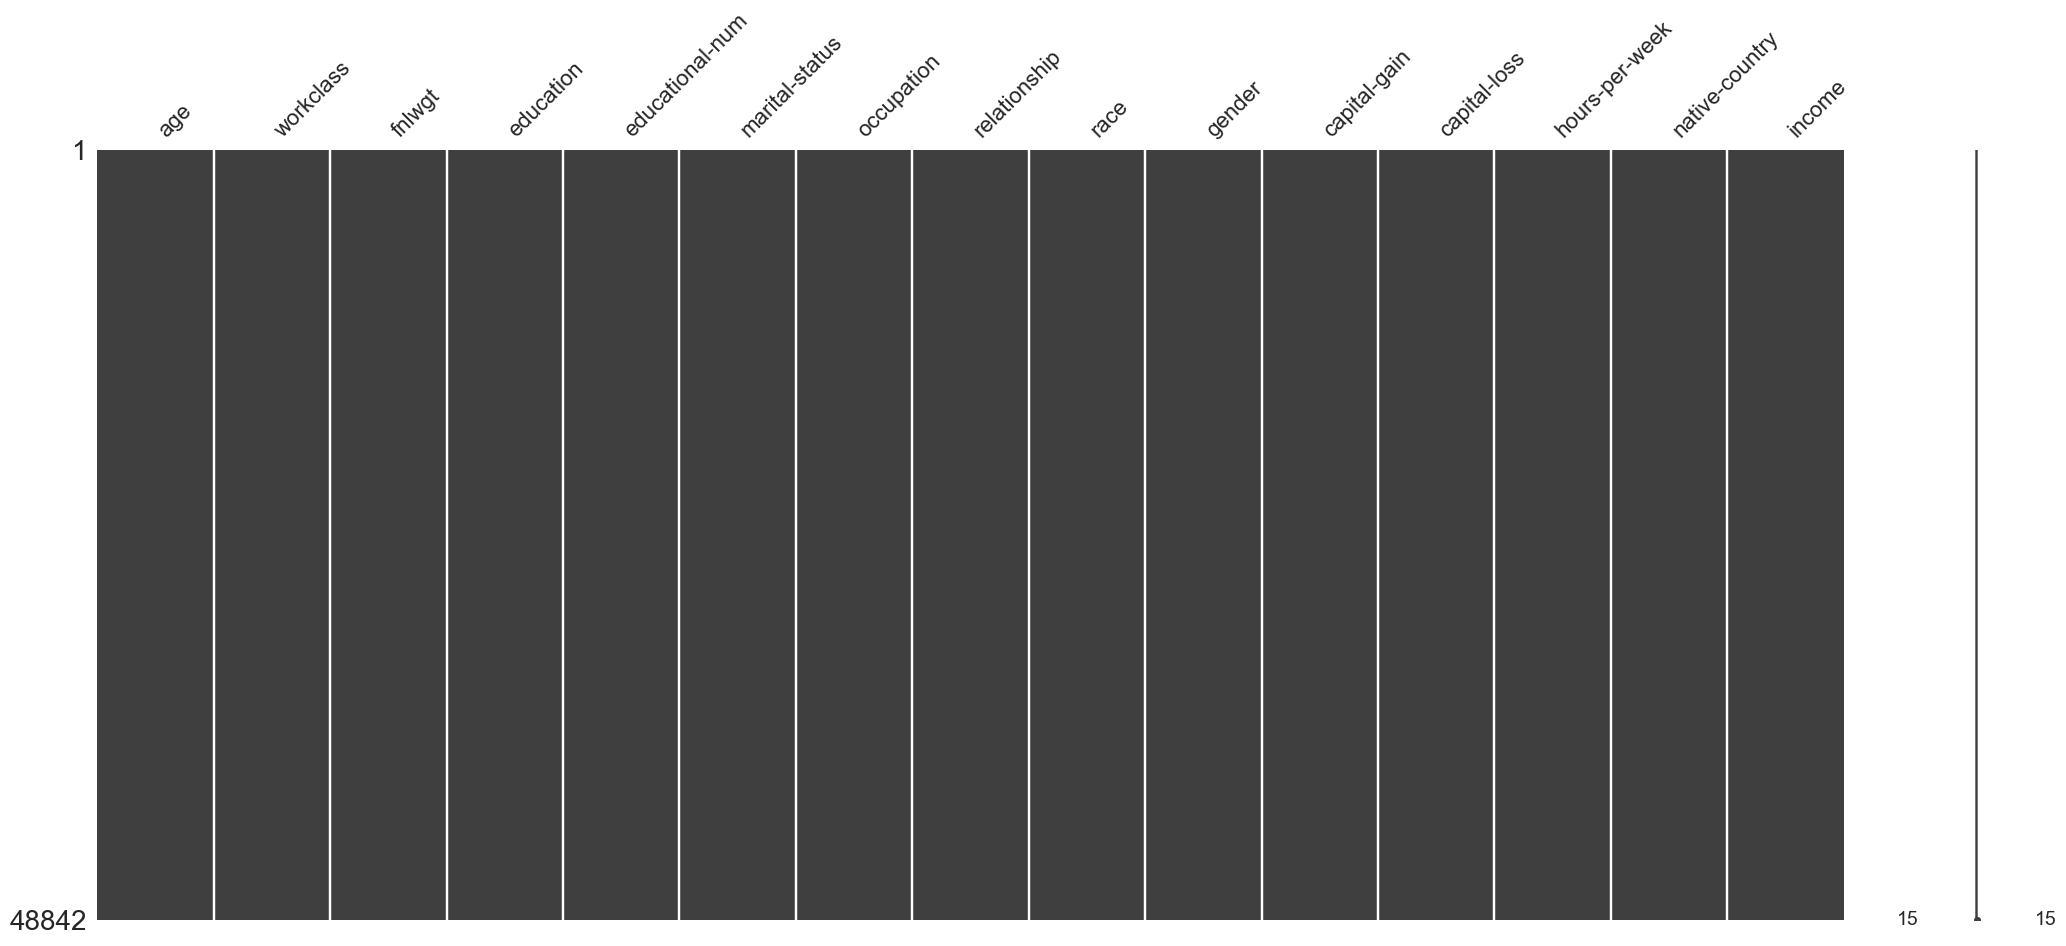

In [2]:
msn.matrix(df);

Esto puede resultar engañoso, ya que parece que no hay nulos.Así, debemos aplicar nuestra función para estandarizar datos nulos (transformarlos a np.nan). A partir de esto, ahora sí se observarán los datos nulos de forma correcta.

workclass         2799
occupation        2809
native-country     857
dtype: int64

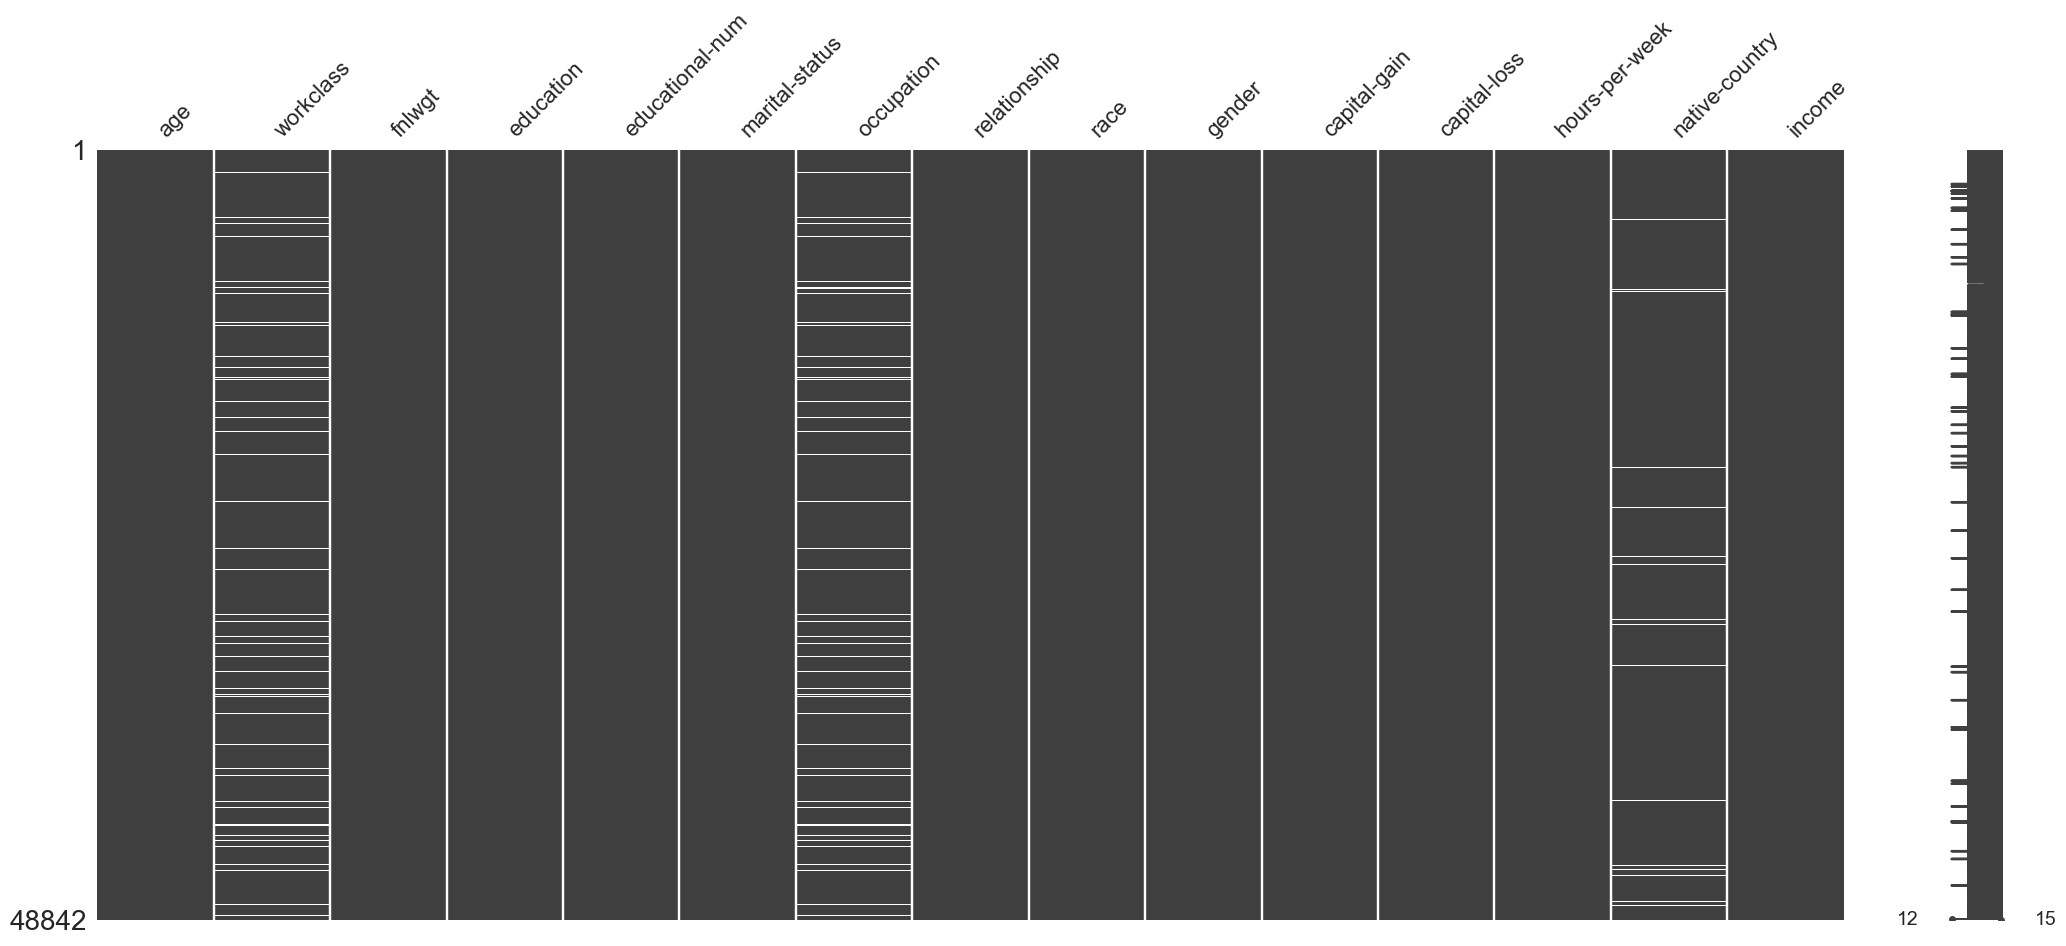

In [3]:
lista_nulos = ['?']
df = f_aux.estandarizar_datos_nulos(df, lista_nulos)
msn.matrix(df);
df[['workclass', 'occupation', 'native-country']].isna().sum()

De cerca de 50 mil datos, workclass y occupation tienen aprox 3 mil registros nulos. Esto no representa un gran porcentaje, sobre todo para variables que a priori tienen tanto impacto sobre el ingreso. Así, se define recodificar como 'Otro' aquellos registros nulos.

## Recodificación inicial y tratamiento de nulos
Dado el gran volumen de clases en varias de las columnas, se procederá a recodificar como lo indica la organización. Esto será una recodificación inicial que nos ayudará a entender mejor los datos. Además, aprovechamos de asignar los nulos a categorías 'Otros' ya que están muy concentrados en ciertas columnas.

El paso de las columnas de valores object a valores numéricos se hará después de la inspección visual.

Se destaca que los diccionarios usados para reemplazar vienen de un .py externo importado en la celda de imports.

In [4]:
# Diccioanrios definidos en diccionarios_reemplazos.py 
df['occupation'].replace(d_aux.dict_occupation,  inplace = True)
df['workclass'].replace(d_aux.dict_workclass,  inplace = True)
df['education'].replace(d_aux.dict_education,  inplace = True)
df['marital-status'].replace(d_aux.dict_marital_status,  inplace = True)
df['native-country'].replace(d_aux.dict_native_country,  inplace = True)

En este punto, tenemos nuestros valores nulos imputados a categorías 'otros'. Esto se hizo así ya que los nulos estaban muy concentrados y eliminar filas completas solo por esas filas no era lo ideal.

## Inspección de variables

El siguiente paso, será hacer una inspección visual de qué variables estamos enfrentando y de cuál es su naturaleza.  

### Ananlizando frecuencias de variables categóricas

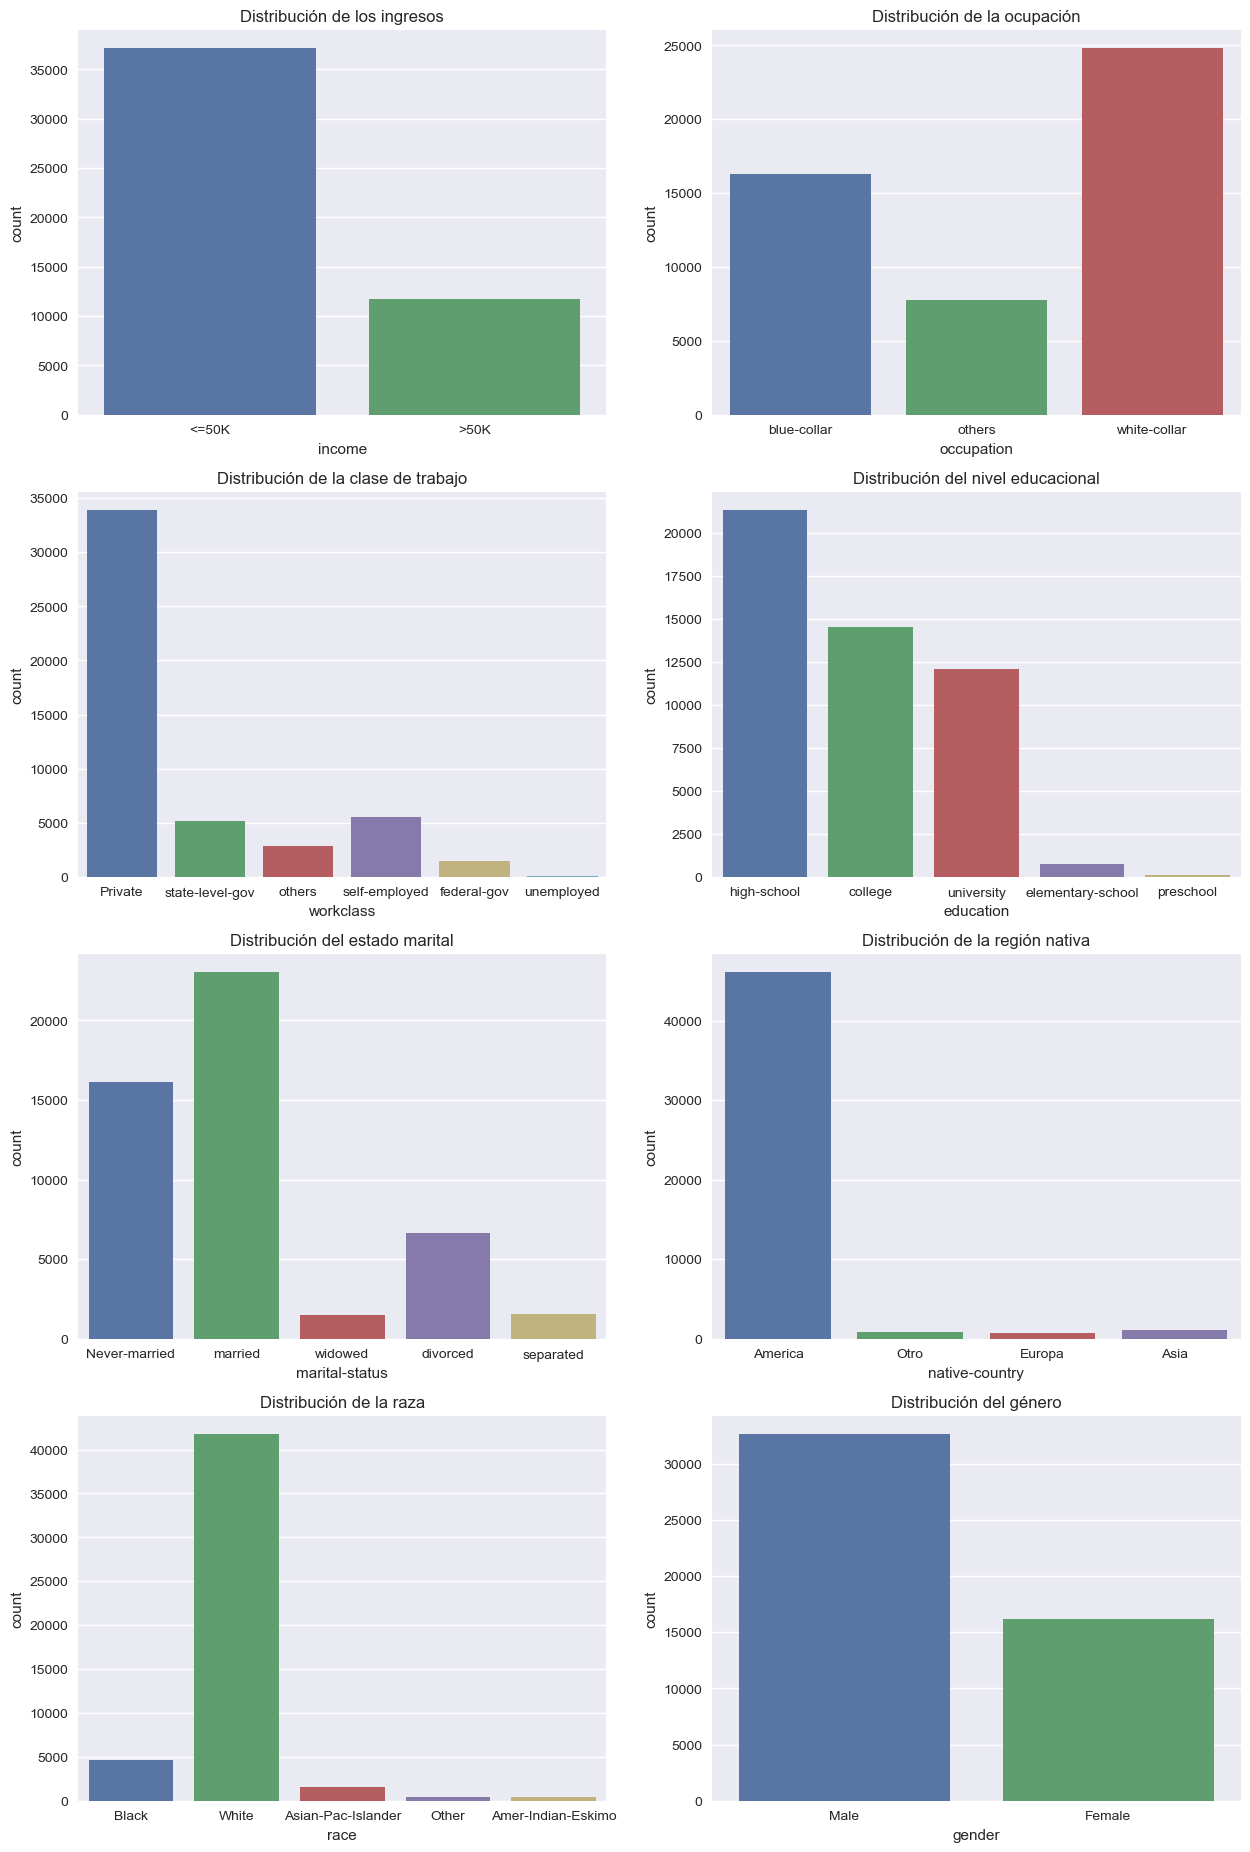

In [5]:
plt.figure(figsize = (15, 23))

plt.subplot(4, 2, 1)
sns.countplot(df['income']).set(title = 'Distribución de los ingresos');

plt.subplot(4, 2, 2)
sns.countplot(df['occupation']).set(title = 'Distribución de la ocupación');

plt.subplot(4, 2, 3)
sns.countplot(df['workclass']).set(title = 'Distribución de la clase de trabajo');

plt.subplot(4, 2, 4)
sns.countplot(df['education']).set(title = 'Distribución del nivel educacional');

plt.subplot(4, 2, 5)
sns.countplot(df['marital-status']).set(title = 'Distribución del estado marital');

plt.subplot(4, 2, 6)
sns.countplot(df['native-country']).set(title = 'Distribución de la región nativa');

plt.subplot(4, 2, 7)
sns.countplot(df['race']).set(title = 'Distribución de la raza');

plt.subplot(4, 2, 8)
sns.countplot(df['gender']).set(title = 'Distribución del género');

#### Comentarios:
- <strong> Ingreso: </strong> se observa que las clases están desbalanceadas, habiendo una menor cantidad de personas que ganan más. Esto es esperable dado lo que sabemos de la realidad.
- <strong> Ocupación: </strong> si bien la clase white collar tiene más observaciones, no es una diferencia tan grande.
- <strong> Workclass: </strong> se observa que la clase 'Private' tiene muchas más observaciones. Eventualmente, podría considerarse otra forma de agrupar las observaciones.
- <strong> Education: </strong> la gran mayoría tiene un nivel high-school al menos. Los que no alcanzan ese nivel educacional son pocos. Eventualmente, se podría agrupar de otra forma.
- <strong> Native-country: </strong> al recodificarlo como continentes, se observa una predominancia enorme de parte de America. Así, una oportunidad a futuro podría ser separar América en sus distintas realidades, ya sea Latam, Norteamérica o CentroAmérica. 
- <strong> Raza: </strong> Gran predominancia de white sobre las otras clases
- <strong> Gender: </strong> No existe una distribución 50-50, sin embargo, está menos desblanceada que, por ejemplo, el ingreso.

En general, se observan clases algo desbalanceadas, sobre todo al ver el caso del continente o la raza. Lo problemático de esto es que puede que estemos agupando observaciones que difieren bajo una misma clase. Por ejemplo, juntamos países de LATAM con USA al agrupar en 'America'. Quizás dentro de esa agrupación se podría dividir más. De momento, se decide mantener así las clases por simpleza.



### Analizando frecuencias en variables continuas

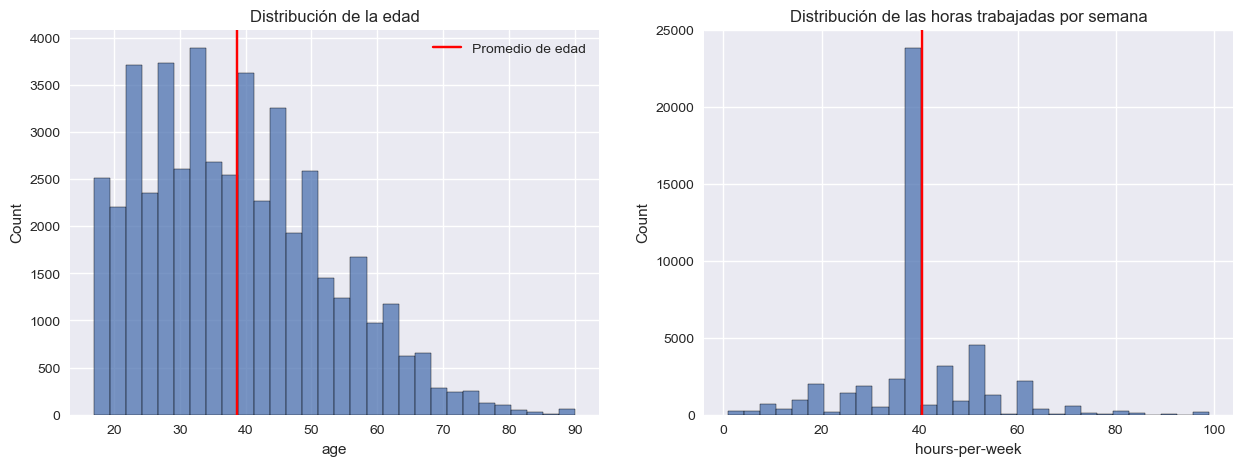

In [6]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.histplot(df['age'], bins = 30).set(title = 'Distribución de la edad');
plt.axvline(df['age'].mean(), c = 'red', label = 'Promedio de edad');
plt.legend()

plt.subplot(1,2,2)
sns.histplot(df['hours-per-week'], bins = 30).set(title = 'Distribución de las horas trabajadas por semana');
plt.axvline(df['hours-per-week'].mean(), c = 'red', label = 'Promedio de edad');

#### Comentarios:
Se observa que la gran mayoría trabaja 40 horas a la semana o más, destacando que hay una gran acumulación justo en las 40 horas.  
En cuanto a la edad, se observa un promedio cercano a los 38 años. Mientras más sube la edad, menos observaciones hay en la muestra.


### Histplot para género e income

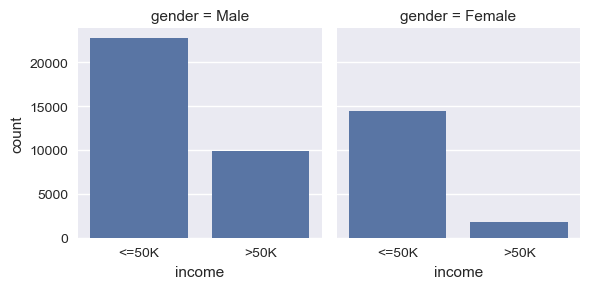

In [7]:
sns.FacetGrid(df, col = 'gender').map(sns.countplot, 'income');

#### Comentarios:
Se observa que la muestra tiene menos mujeres que hombres. Es sabido que en el mundo la distribución es más 50-50, de modo que se observa una subrepresentación. Ahora, la muestra contiene 'fnlwgt' que es el ponderador muestral, que en teoría debiese resolver estos sesgos al hacer ciertos análisis econométricos.  
Lo otro que llama la atención es que, además de haber menos mujeres, también la proporción que gana sobre 50k es muy inferior. Ahí habría que ahondar si se trata de un sesgo del muestreo o sencillamente una representación de la realidad. 


### Frecuencias relativas para educación para hombres y mujeres

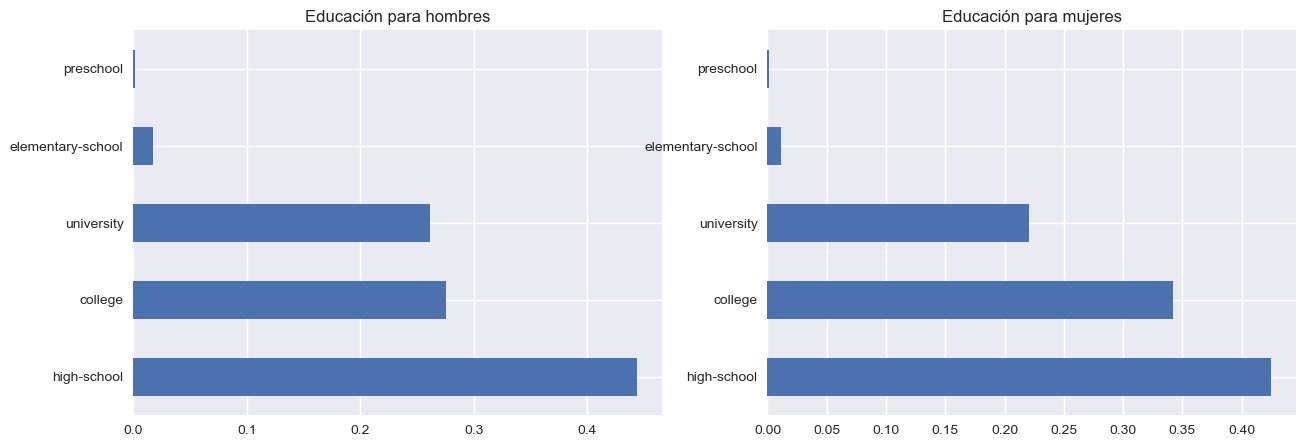

In [8]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
df.loc[df['gender'] == 'Male', 'education'].value_counts('%').plot(kind="barh", title = 'Educación para hombres');
plt.subplot(1, 2, 2)
df.loc[df['gender'] == 'Female', 'education'].value_counts('%').plot(kind="barh", title = 'Educación para mujeres');


#### Comentarios
Para las mujeres, un mayor % quedó en college (34% aprox). Mientras que los hombres tienen un porcentaje menor de college (27%). Sin embargo, esto se compensa por university, puesto que ahí los hombres tienen 25% vs 22% de las mujeres.

### Boxplot de horas por semana por continente y género

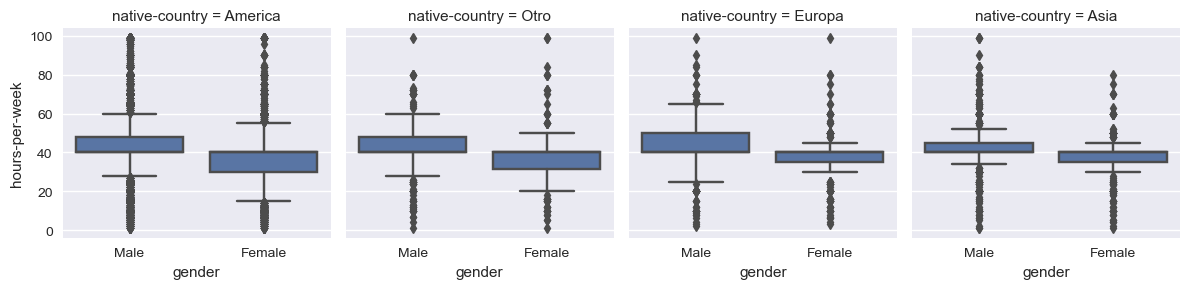

In [9]:
sns.FacetGrid(df, col = 'native-country').map(sns.boxplot, 'gender', 'hours-per-week' );

#### Comentarios:
Primero que todo, en todos los gráficos se observa una gran dispersión en los boxplot. Dicho eso, se observa que marginalmente el hours-per-week es mayor en los hombres. Esto es transversal a los continentes.

### Boxplot para hours-per-week por género y categoría de ingreso.

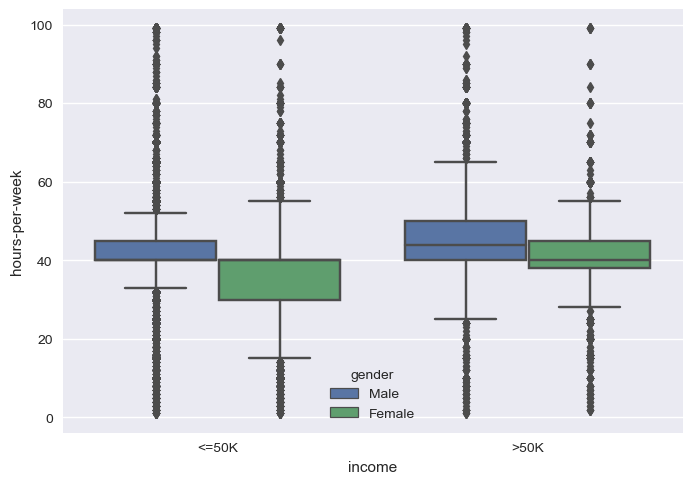

In [10]:
sns.boxplot(x = df['income'], y = df['hours-per-week'], hue = df['gender']);

#### Comentarios:
Se observa que en promedio los hombres de la muestra trabajan en promedio más horas que las mujeres de la muestra. Además, como es de esperar, la tendencia es que quienes tienen mayor income, también trabajan más horas en la semana.


### lmpPlot para Age y native Country

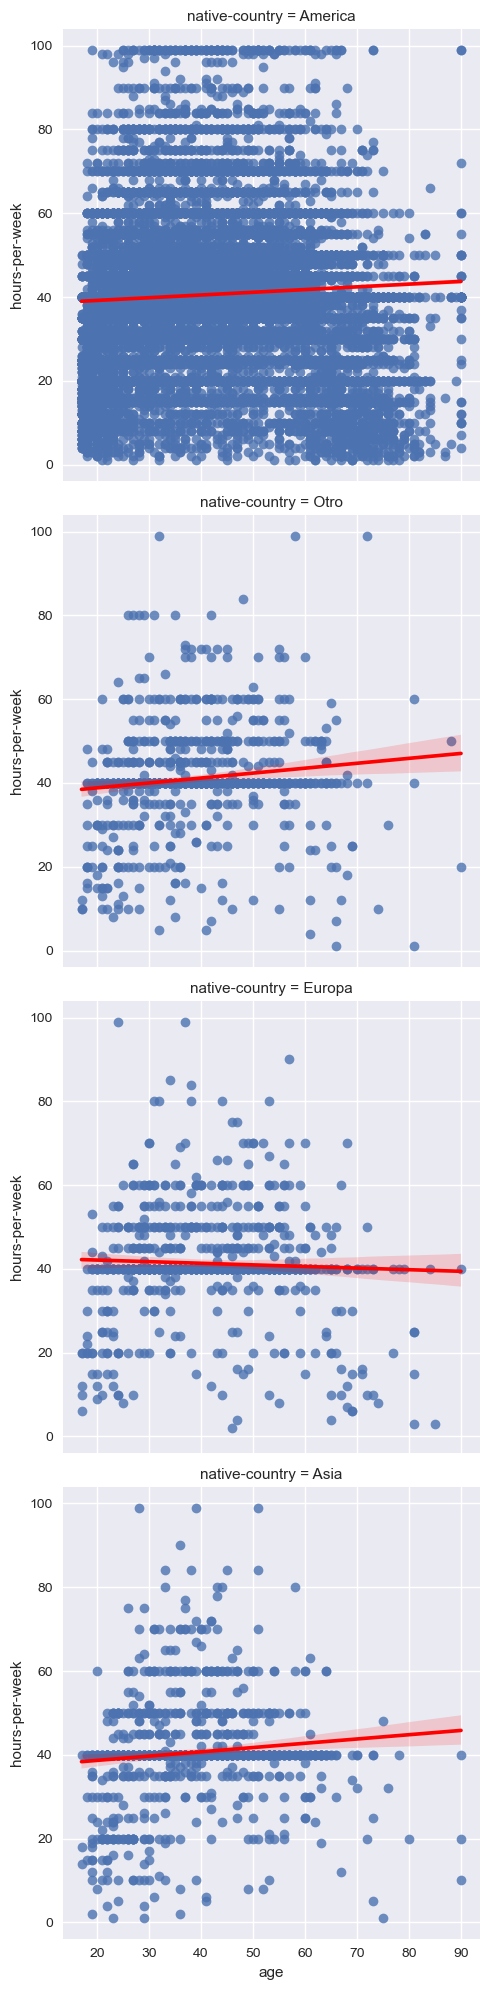

In [11]:
sns.lmplot( 'age', 'hours-per-week', row = 'native-country', data = df, line_kws={'color': 'red'});

#### Comentarios:
A priori, la nube de puntos no da tantas luces sobre la relación entre Age y Hours-per-week. Sin embargo, al ver la recta de regresión, se podría entender que gente de mayor edad, tiende a trabajar más horas. Ahora, esto es una conclusión muy acelerada, puesto que es posible que en cierto rango esto sea real, pero en otros no.  

Digamos, es natural y esperable que en promedio una persona de 40 años trabaje más que una de 20, sin embargo, no necesariamente que una de 80 trabaje más que una de 60.  


La conclusión no cambia al analizar por región. Solo se observa que la nube de puntos de America es mucho más grande.

## Recodificación definitiva


In [12]:
# Estas columnas se mantienen tal cual
cols_mantienen = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
df_mantienen = df[cols_mantienen]

# Estas columnas deben ser recodificadas generando una 'jerarquía' dentro de ellas
cols_replace = ['education', 'occupation']
# Asignamos hasta high school a 0, college a 1 y university a 2.
df['education_recod'] = df['education'].replace(
                        ['high-school', 'college', 'university', 'elementary-school', 'preschool'],
                        [0, 1, 2, 0, 0])
# Asignamos white collar a 2, blue collar a 1 y others a 0
df['occupation_recod'] = df['occupation'].replace(
                        ['white-collar', 'blue-collar', 'others'],
                        [2, 1, 0])
df_replace = df[['education_recod', 'occupation_recod']] 

# Estas columnas deben ser recodicadas a través de get_dummies. Cuando hay más de 2 categorías, generaremos columnas adicionales.
cols_get_dummies = ['marital-status', 'relationship', 'race', 'gender',
                    'native-country', 'income', 'workclass']
df_dummies = pd.get_dummies(df[cols_get_dummies], drop_first = True)


In [13]:
df_final = pd.concat([df_mantienen, df_replace, df_dummies], axis = 1)
print(df_final.columns)
df_final.head()

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'education_recod', 'occupation_recod', 'marital-status_divorced',
       'marital-status_married', 'marital-status_separated',
       'marital-status_widowed', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'gender_Male', 'native-country_Asia', 'native-country_Europa',
       'native-country_Otro', 'income_>50K', 'workclass_federal-gov',
       'workclass_others', 'workclass_self-employed',
       'workclass_state-level-gov', 'workclass_unemployed'],
      dtype='object')


,age,capital-gain,capital-loss,hours-per-week,education_recod,occupation_recod,marital-status_divorced,marital-status_married,marital-status_separated,marital-status_widowed,...,gender_Male,native-country_Asia,native-country_Europa,native-country_Otro,income_>50K,workclass_federal-gov,workclass_others,workclass_self-employed,workclass_state-level-gov,workclass_unemployed
0,25,0,0,40,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,38,0,0,50,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,0,0,40,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,44,7688,0,40,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,18,0,0,30,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Finalmente, tenemos la nuestro dataframe que utilizaremos, con las columnas recodificadas y numéricas.

# Hito 3

## Modelación descriptiva
En la presente sección se presentan 2 modelos econométricos que se construyen para el problema planteado. El primero es un modelo saturado, mientras que el segundo es la versión que incluye solo los regresores estadísticamente significativos.

In [14]:
# Por restricciones de la 'fórmula' en stats models debemos realizar reemplazos en nuestros valores.
df_final.columns = df_final.columns.str.replace('-', '_') # Eliminamos los guiones
df_final.columns = df_final.columns.str.replace('>', 'G_') # Eliminamos el símbolo '>'

### Primer modelo - completo

In [15]:
columnas_modelo_1 = list(df_final.columns) # El primer modelo utilizará todas las columnas
formula_modelo_1 = f_aux.generar_formula_regresion(columnas_modelo_1, 'income_G_50K') # Generamos la fórmula
modelo_1 = smf.logit(formula_modelo_1, df_final).fit() # Generamos y ajustamos el modelo
resultado_1 = modelo_1.summary2().tables[1] # Guardamos el resultado
resultado_1

Optimization terminated successfully.
         Current function value: 0.328466
         Iterations 9


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-7.070440,0.245050,-28.853096,4.633337e-183,-7.550729,-6.590152
age,0.023423,0.001279,18.316782,6.080311e-75,0.020917,0.025929
capital_gain,0.000318,0.000008,38.388756,0.000000e+00,0.000302,0.000334
capital_loss,0.000661,0.000029,22.456064,1.116527e-111,0.000604,0.000719
hours_per_week,0.029478,0.001245,23.671339,7.117631e-124,0.027037,0.031918
education_recod,0.757112,0.019090,39.659669,0.000000e+00,0.719696,0.794528
occupation_recod,0.694113,0.028628,24.245757,7.329986e-130,0.638003,0.750224
marital_status_divorced,0.498853,0.070362,7.089765,1.343401e-12,0.360945,0.636760
marital_status_married,1.254331,0.129699,9.671113,4.000023e-22,1.000126,1.508536
marital_status_separated,0.397314,0.133076,2.985625,2.829994e-03,0.136491,0.658138


#### Comentarios
Vemos un modelo que incluye todas las variables. Si bien la gran mayoría de variables es estadísticamente significativa al 0.05, aún hay regresores que no cumplen. Es por esto que planteamos un Modelo 2 que incluye solo lo estadísticamente significativo. Será este el que usaremos para interpretar los regresores.

### Modelo 2: mantenemos todo lo estadísticamente significativo

In [16]:
columnas_modelo_2 = list(resultado_1[resultado_1['P>|z|'] < 0.05].index)[1:] # Excluimos el intercepto
formula_modelo_2 = f_aux.generar_formula_regresion(columnas_modelo_2, 'income_G_50K')
modelo_2 = smf.logit(formula_modelo_2, df_final).fit()
resultado_2 = modelo_2.summary2().tables[1]
resultado_2

Optimization terminated successfully.
         Current function value: 0.328614
         Iterations 9


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.732935,0.175612,-38.339843,0.000000e+00,-7.077128,-6.388742
age,0.023802,0.001257,18.938900,5.452407e-80,0.021339,0.026265
capital_gain,0.000319,0.000008,38.411919,0.000000e+00,0.000302,0.000335
capital_loss,0.000662,0.000029,22.472914,7.640940e-112,0.000604,0.000719
hours_per_week,0.029330,0.001242,23.621776,2.302647e-123,0.026896,0.031764
education_recod,0.760609,0.018547,41.010616,0.000000e+00,0.724258,0.796959
occupation_recod,0.672737,0.025276,26.615954,4.437362e-156,0.623198,0.722277
marital_status_divorced,0.495130,0.070299,7.043182,1.878980e-12,0.357346,0.632914
marital_status_married,1.245170,0.129528,9.613134,7.037380e-22,0.991300,1.499040
marital_status_separated,0.398231,0.133023,2.993698,2.756189e-03,0.137511,0.658952


#### Comentarios
Vemos que el número de variables no cambió tanto. Ahora, es válido preguntarse cómo se compara la log verosimilitud de ambos modelos, de modo de ver cuál ajusta mejor.

In [17]:
print (f'La log verosimilitud del modelo 1 (saturado) es {modelo_1.llf}')
print (f'La log verosimilitud del modelo 2 (p_value < 0.05) es {modelo_2.llf}')

La log verosimilitud del modelo 1 (saturado) es -16042.932743323388
La log verosimilitud del modelo 2 (p_value < 0.05) es -16050.177060482569


Como es de esperar, la log verosimilitud del modelo saturado es mejor (más cercana a 0). Ahora, esto es a costa de tener regresores que no son estadísticamente distintos de 0. Esto tampoco es una situación deseable, de modo que es preferible un modelo como el 2 cuyos efectos son interpretables de manera más correcta.

### Cómo afecta cada variable a la probabilidad
En esta sección, se evaluará cómo cada regresor afecta a la variable dependiente. Primero, dividiendo entre efectos positivos y negativos sobre la probabilidad de ganar más de 50k. A posteriori, se construyen ejemplos para diferenciar cómo cambia la probabilidad al alterar algunas de las variables.

In [18]:
resultado_2[resultado_2['Coef.'] > 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
age,0.023802,0.001257,18.938900,5.452407e-80,0.021339,0.026265
capital_gain,0.000319,0.000008,38.411919,0.000000e+00,0.000302,0.000335
capital_loss,0.000662,0.000029,22.472914,7.640940e-112,0.000604,0.000719
hours_per_week,0.029330,0.001242,23.621776,2.302647e-123,0.026896,0.031764
education_recod,0.760609,0.018547,41.010616,0.000000e+00,0.724258,0.796959
occupation_recod,0.672737,0.025276,26.615954,4.437362e-156,0.623198,0.722277
marital_status_divorced,0.495130,0.070299,7.043182,1.878980e-12,0.357346,0.632914
marital_status_married,1.245170,0.129528,9.613134,7.037380e-22,0.991300,1.499040
marital_status_separated,0.398231,0.133023,2.993698,2.756189e-03,0.137511,0.658952
marital_status_widowed,0.544144,0.127352,4.272770,1.930599e-05,0.294540,0.793749


Aquí podemos ver los factores que inciden positivamente en la probabilidad de ganar más de 50k.
- A mayor edad es más probable tener mayor ingreso.
- Tanto las ganancias como pérdidas de capital aumentan la chance de tener mayor ingreso. Esto es esperable, dado que es improbable que gente de menor ingreso entre a inversiones.
- A mayor cantidad de horas,  mayor ingreso.
- Haber alcanzado un mayor nivel educacional aumenta la chance de mayor ingreso.
- Una profesión white collar mejora la probabilidad frente a blue collar u other
- Para los posibles estados respecto al matrimonio, el que menos probablemente ganará más de 50k es el nunca casado. Este está representado por un 0 en las 4 variables 'marital_status'. En cambio, pertenecer a cualquiera de las otras 4 aumenta la probabilidad. Aquí, el que más aumenta el log odds, y por tanto la probabilidad, es estar casado.
- Considerando que el relationship base es 'Husband', entonces ser 'Wife' en la muestra aumenta la probabilidad de ganar más de 50k.
- En cuanto a la raza, el nivel base es pertenecer a 'Amer-Indian-Eskimo'. Así, pertenecer a White aumenta la probabilidad.
- Ser hombre aumenta la probabilidad.
- Respecto a workclass = 'Private', ser 'Federal_gov' aumenta la probabilidad
 

In [19]:
resultado_2[resultado_2['Coef.'] < 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.732935,0.175612,-38.339843,0.000000e+00,-7.077128,-6.388742
relationship_Not_in_family,-0.972743,0.126529,-7.687876,1.495982e-14,-1.220736,-0.724750
relationship_Other_relative,-1.560022,0.180996,-8.619101,6.748197e-18,-1.914768,-1.205277
relationship_Own_child,-2.013937,0.159331,-12.639920,1.271831e-36,-2.326221,-1.701653
relationship_Unmarried,-1.228963,0.143310,-8.575540,9.862262e-18,-1.509846,-0.948080
native_country_Asia,-0.292023,0.137210,-2.128287,3.331325e-02,-0.560950,-0.023096
workclass_self_employed,-0.316261,0.040477,-7.813389,5.567049e-15,-0.395594,-0.236928


#### Comentarios
En cuanto a los regresores que impactan negativamente el ingreso son:
- Respecto a tener relationship = 'husband', cualquier otra relación, salvo wife, disminuye la probabilidad de ganar más de 50k.
- Respecto a ser nativo de America, aquellos provenientes de Asia tienen una menor probabilidad de ganar más de 50k.
- Respecto a workclass = Private, ser self-employed baja la probabilidad de tener un ingreso alto.

### Comparando casos específicos
De momento, solo hemos hablado del signo que tiene cada regresor. Para hablar de magnitud debemos definir un individuo.

Esto lo haremos con algunos promedios y algunas modas. Usamos promedios en aquellas variables que son continuas. En cambio, debemos usar la moda en las que son categóricas. Con esta metodología, podemos generar un individuo representativo de la muestra. Se destaca que este es un individuo consistente (no es por ejemplo white y black al mismo tiempo) ya que la moda solo será 1 en aquella columna mayoritaria, que en este caso es única para cada clase.

In [20]:
individuo = {
'age'                        : df_final['age'].mean(),
'capital_gain'               : df_final['capital_gain'].mean(),
'capital_loss'               : df_final['capital_loss'].mean(),
'hours_per_week'             : df_final['hours_per_week'].mean(),
'education_recod'            : df_final['education_recod'].mode()[0],
'occupation_recod'           : df_final['occupation_recod'].mode()[0],
'marital_status_divorced'    : df_final['marital_status_divorced'].mode()[0],
'marital_status_married'     : df_final['marital_status_married'].mode()[0],
'marital_status_separated'   : df_final['marital_status_separated'].mode()[0],
'marital_status_widowed'     : df_final['marital_status_widowed'].mode()[0],
'relationship_Not_in_family' : df_final['relationship_Not_in_family'].mode()[0],
'relationship_Other_relative': df_final['relationship_Other_relative'].mode()[0],
'relationship_Own_child'     : df_final['relationship_Own_child'].mode()[0],
'relationship_Unmarried'     : df_final['relationship_Unmarried'].mode()[0],
'relationship_Wife'          : df_final['relationship_Wife'].mode()[0],
'race_Asian_Pac_Islander'    : df_final['race_Asian_Pac_Islander'].mode()[0],
'race_Black'                 : df_final['race_Black'].mode()[0],
'race_Other'                 : df_final['race_Other'].mode()[0],
'race_White'                 : df_final['race_White'].mode()[0],
'gender_Male'                : df_final['gender_Male'].mode()[0],
'native_country_Asia'        : df_final['native_country_Asia'].mode()[0],
'native_country_Europa'      : df_final['native_country_Europa'].mode()[0],
'native_country_Otro'        : df_final['native_country_Otro'].mode()[0],
'workclass_federal_gov'      : df_final['workclass_federal_gov'].mode()[0],
'workclass_others'           : df_final['workclass_others'].mode()[0],
'workclass_self_employed'    : df_final['workclass_self_employed'].mode()[0],
'workclass_state_level_gov'  : df_final['workclass_state_level_gov'].mode()[0],
'workclass_unemployed'       : df_final['workclass_unemployed'].mode()[0],}
individuo

{'age': 38.64358543876172,
 'capital_gain': 1079.0676262233324,
 'capital_loss': 87.50231358257237,
 'hours_per_week': 40.422382375824085,
 'education_recod': 0,
 'occupation_recod': 2,
 'marital_status_divorced': 0,
 'marital_status_married': 0,
 'marital_status_separated': 0,
 'marital_status_widowed': 0,
 'relationship_Not_in_family': 0,
 'relationship_Other_relative': 0,
 'relationship_Own_child': 0,
 'relationship_Unmarried': 0,
 'relationship_Wife': 0,
 'race_Asian_Pac_Islander': 0,
 'race_Black': 0,
 'race_Other': 0,
 'race_White': 1,
 'gender_Male': 1,
 'native_country_Asia': 0,
 'native_country_Europa': 0,
 'native_country_Otro': 0,
 'workclass_federal_gov': 0,
 'workclass_others': 0,
 'workclass_self_employed': 0,
 'workclass_state_level_gov': 0,
 'workclass_unemployed': 0}

Podemos observar que nuestro individuo es un hombre blanco que trabaja aprox 40 horas, que hizo high - school y ha invertido. Ahora, podemos generar 3 individuos más que sean algo diferentes, variando el sexo y la raza.

In [21]:
# Generamos 4 copias de nuestro individuo y alteramos los diccionarios para crear nuevos individuos
hombre_blanco, mujer_blanca, mujer_negra, hombre_negro = individuo.copy(), individuo.copy(), individuo.copy(), individuo.copy()

mujer_blanca.update({'race_White': 1,
                   'race_Black': 0,
                   'gender_Male': 0})

mujer_negra.update({'race_White': 0,
                   'race_Black': 1,
                   'gender_Male': 0})

hombre_negro.update({'race_White': 0,
                   'race_Black': 1,
                   'gender_Male': 1})

In [22]:
# Calculamos log odds con nuestra función externa usando el modelo 2 y el individuo correspondiente
log_odds_hombre_blanco = f_aux.calcular_log_odds(modelo_2, hombre_blanco)
log_odds_mujer_blanca = f_aux.calcular_log_odds(modelo_2, mujer_blanca)
log_odds_mujer_negra = f_aux.calcular_log_odds(modelo_2, mujer_negra)
log_odds_hombre_negro = f_aux.calcular_log_odds(modelo_2, hombre_negro)

# Transformamos el log odds en probabilidad
p_hombre_blanco = f_aux.inverse_logit(log_odds_hombre_blanco)
p_mujer_blanca  = f_aux.inverse_logit(log_odds_mujer_blanca)
p_mujer_negra   = f_aux.inverse_logit(log_odds_mujer_negra)
p_hombre_negro  = f_aux.inverse_logit(log_odds_hombre_negro)

# Print el resultado
print(f'La probabilidad de que un hombre blanco gane más de 50k es de {p_hombre_blanco}')
print(f'La probabilidad de que un hombre negro gane más de 50k es de {p_hombre_negro}')
print(f'La probabilidad de que una mujer blanca gane más de 50k es de {p_mujer_blanca}')
print(f'La probabilidad de que una mujer negra gane más de 50k es de {p_mujer_negra}')

La probabilidad de que un hombre blanco gane más de 50k es de 0.14217375156187198
La probabilidad de que un hombre negro gane más de 50k es de 0.10838515375011057
La probabilidad de que una mujer blanca gane más de 50k es de 0.07106130927471309
La probabilidad de que una mujer negra gane más de 50k es de 0.05312642173571134


Con poca sorpresa podemos ver que la probabilidad de ganar más de 50k está determinada, al menos en el individuo 'representativo', por el género y la raza. Un hombre blanco tiene un 0.14 de probabilidad de tener alto ingreso, en cambio, si es una mujer negra, esta probabilidad disminuye a 0.05. 

Como segundo ejemplo, generemos dos individuos. Uno que ha ganado el máximo en capital y perdido el mínimo (buen inversor), versus otro que haya perdido el máximo y ganado el mínimo (mal inversor).

In [23]:
individuo_mal_inversor = individuo.copy()
individuo_mal_inversor.update({
                        'capital_gain': df_final['capital_gain'].min(),
                        'capital_loss': df_final['capital_loss'].max()})

individuo_buen_inversor = individuo.copy()
individuo_buen_inversor.update({
                        'capital_gain': df_final['capital_gain'].max(),
                        'capital_loss': df_final['capital_loss'].min()})

p_mal_inversor = f_aux.inverse_logit(f_aux.calcular_log_odds(modelo_2, individuo_mal_inversor))
p_buen_inversor = f_aux.inverse_logit(f_aux.calcular_log_odds(modelo_2, individuo_buen_inversor))


print(f'La probabilidad de que un buen inversor gane más de 50k es de {p_buen_inversor}')
print(f'La probabilidad de que un mal inversor gane más de 50k es de {p_mal_inversor}')

La probabilidad de que un buen inversor gane más de 50k es de 0.9999999999998677
La probabilidad de que un mal inversor gane más de 50k es de 0.6643097678779684


#### Comentarios
Se observa que ambos individuos, ya por el hecho de invertir, tienen una gran probabilidad de pertenecer al grupo >50k. Incluso el que teóricamente peor invierte tiene un 0.66 de probabilidad de tener alto ingreso.

## Opciones modelación

Finalmente, debemos hablar de cómo se hará la modelación predictiva. En este caso, el enfoque será generar un modelo que pueda generalizar los resultados. Tendremos que tomar la muestra, dividirla entre train y test, y usar solo la data de train para entrenar. En cambio, usaremos test para validar los modelos con las métricas ya mencionadas.

En cuanto a qué enfoques de modelación se utilizará, se plantean los siguientes:

- Modelo 1: modelo saturado con todas las variables
- Modelo 2: modelo depurado que incluya solo las variables estadísticamente significativas encontradas con el enfoque econométrico.
- Modelo 3: Utilizar age al cuadrado, puesto que es posible que el efecto de la edad sobre el ingreso no sea constante en todo el dominio de la edad. Además, se propone utilizar una variable binaria que indique si el individuo es 'inversor' (capital_gain + capital_loss > 1 then 1 else 0)


## Hito 4

Inicialmente, generamos dos nuevas variables en específico para el Modelo 3

In [24]:
df_final['inversor'] = np.where(df_final['capital_gain'] + df_final['capital_loss'] > 0,1,0)
df_final['age_squared'] = df_final['age'] ** 2

Definimos, para cada uno de los 3 modelos, la lista de columnas a utilizar.

In [25]:
# Modelo saturado: usará todas las columnas
columnas_modelo_1 = list(df_final.columns)
columnas_modelo_1.remove('income_G_50K')
columnas_modelo_1.remove('inversor')
columnas_modelo_1.remove('age_squared')

# Modelo depurado. Usará solo columnas estadísticamente significativas
columnas_modelo_2 = list(resultado_1[resultado_1['P>|z|'] < 0.05].index)[1:]

# Utilizar age al cuadrado para modelar, además de capital_gain + capital_loss > 1 then 1 else 0
columnas_modelo_3 = list(resultado_1[resultado_1['P>|z|'] < 0.05].index)[1:]
columnas_modelo_3.append('inversor')
columnas_modelo_3.append('age_squared')

In [26]:
# Generamos un vector y y la matriz de atributos x (no tiene el income)
y_vec = df_final.pop('income_G_50K')
X_mat = df_final

Generamos el split entre train y test. Destacar que este se hace sobre todo el DataFrame en caso de la matriz X. Esto es porque a posteriori se tomarán las columnas de acuerdo a cada modelo.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=11238)

Generamos, para cada modelo, un set de prueba y un set de entrenamiento. Cada uno con sus columnas respectivas.  
Luego, generamos 3 modelos con logreg() y los entrenamos con los datos respectivos.

In [28]:
X_train_1 = X_train[columnas_modelo_1]
X_train_2 = X_train[columnas_modelo_2]
X_train_3 = X_train[columnas_modelo_3]

X_test_1 = X_test[columnas_modelo_1]
X_test_2 = X_test[columnas_modelo_2]
X_test_3 = X_test[columnas_modelo_3]

In [29]:
modelo_ML_1 = logreg().fit(X_train_1, y_train)
modelo_ML_2 = logreg().fit(X_train_2, y_train)
modelo_ML_3 = logreg().fit(X_train_3, y_train)

Generamos una predicción y_hat que indicará para cada dato del set de prueba si el modelo lo clasifica como clase 1 o clase 0. También se podrían predecir las probabilidades, sin embargo, en este caso no se usará.

In [30]:
modelo_1_yhat = modelo_ML_1.predict(X_test_1) 
modelo_2_yhat = modelo_ML_2.predict(X_test_2) 
modelo_3_yhat = modelo_ML_3.predict(X_test_3) 

### Resultados
A continuación, se muestran y discuten los principales resultados.

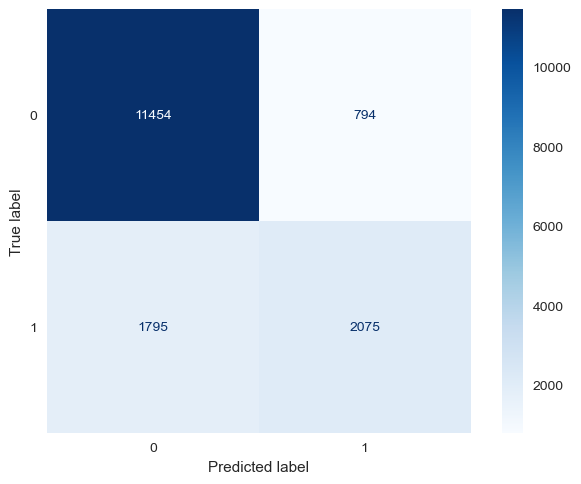

In [31]:
ConfusionMatrixDisplay.from_estimator(
    modelo_ML_1,   
    X_test_1,      
    y_test,        
    cmap="Blues"   
);
# Elimina la grilla de líneas blancas verticales y horizontales
plt.grid(False);

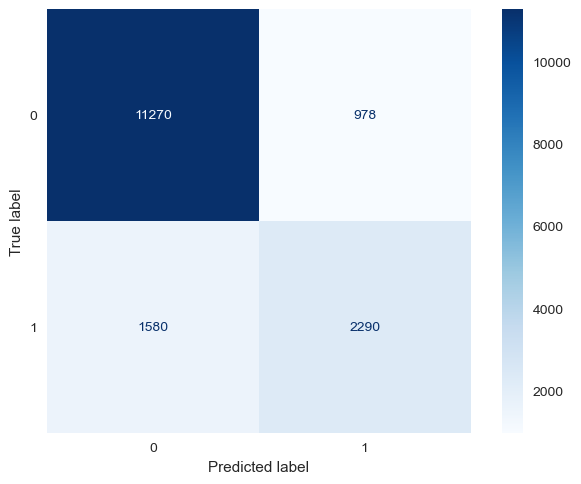

In [32]:
ConfusionMatrixDisplay.from_estimator(
    modelo_ML_2,   
    X_test_2,      
    y_test,        
    cmap="Blues"   
);
# Elimina la grilla de líneas blancas verticales y horizontales
plt.grid(False);

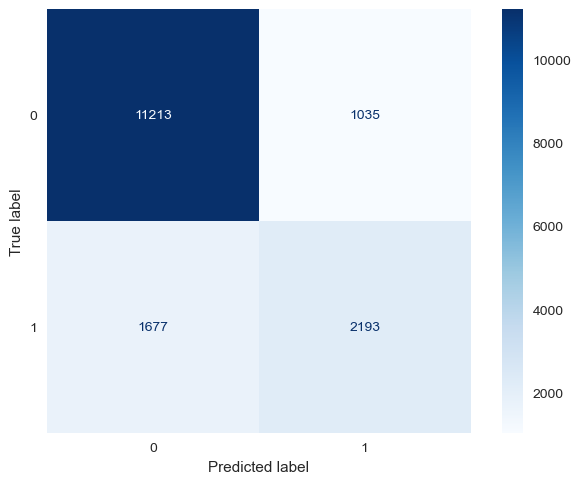

In [33]:
ConfusionMatrixDisplay.from_estimator(
    modelo_ML_3,   
    X_test_3,      
    y_test,        
    cmap="Blues"   
);
# Elimina la grilla de líneas blancas verticales y horizontales
plt.grid(False);

### Comentarios
Se muestran las matrices de confusión para los 3 modelos. A priori, se observa lo que ya sabíamos, hay más observaciones de clase 0 que de clase 1. Es decir, la muestra tiene más personas que ganan menos de 50k. Con eso en mente, se ve que el cuadrante de Verdadero Negativo tiene una gran cantidad de observaciones. Verdadero positivo es el segundo que más tiene, pero seguido de cerca por los Falsos negativos y por los Falsos positivos.  
Todo esto se analizará con precision, recall y F1.

In [34]:
print('Resultados del primer modelo (saturado)')
print(classification_report(y_test, modelo_1_yhat))
print()
print('Resultados del segundo modelo (solo variables significativas)')
print(classification_report(y_test, modelo_2_yhat))
print()
print('Resultados del tercer modelo (nuevas variables)')
print(classification_report(y_test, modelo_3_yhat))

Resultados del primer modelo (saturado)
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     12248
           1       0.72      0.54      0.62      3870

    accuracy                           0.84     16118
   macro avg       0.79      0.74      0.76     16118
weighted avg       0.83      0.84      0.83     16118


Resultados del segundo modelo (solo variables significativas)
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12248
           1       0.70      0.59      0.64      3870

    accuracy                           0.84     16118
   macro avg       0.79      0.76      0.77     16118
weighted avg       0.83      0.84      0.84     16118


Resultados del tercer modelo (nuevas variables)
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     12248
           1       0.68      0.57      0.62      3870

    accuracy                  

###### Precision
Se entiende como la tasa en la que las predicciones positivas resultan verdaderas positivas. Es decir, son los VP sobre (VP + FP). 

- Si consideramos la clase predicha 'ganar mas de 50k', los 3 modelos tienen un rendimiento alrededor del 70%, destacando levemente el modelo saturado con un 72%. Este número implica que el 72% de lo predicho como positivo es realmente positivo.
- En cambio, si consideramos la clase predicha 'ganar menos de 50k', los resultados son mejores, llegando al 88%, aunque nuevamente similares en los 3 casos. Nuevamente, esto se puede interpretar como que el 88% de las veces que el modelo indicó que alguien gana menos de 50k, le atinó.

###### Recall
Se entiende como la tasa en que observaciones positivas son correctamente predichas por el modelo. Es decir, son los VP sobre los (VP + FN). 
- Si consideramos la clase predicha 'ganar mas de 50k', en ese caso los modelos tienen un porcentaje de acierto cercano al 57%. Eso indica que el 57% de quienes ganan más de 50k fueron identificados por el modelo.
- Por otro lado, si la clase predicha fuese 'ganar menos de 50k', vemos que los modelos tienen rendimientos cercanos al 92%. Es decir, del total de personas que no superan los 50k, el modelo identificó al 92%.

###### F1
Corresponde a la media armónica entre Recall y Precision. En la práctica, solo obtienes un buen resultado cuando ambos son buenos. En este sentido, está alineado con los indicadores recién vistos.
En este indicador, al igual que en los dos anteriores, el Modelo 1 (saturado) y el Modelo 2 (solo estadísticamente significativos) no tienen grandes diferencias. Seguramente porque las columnas que excluye el segundo efectivamente son poco significativas. En cambio, el tercer modelo no tiene un buen rendimiento pese a que se le incluyen más columnas. Esto puede deberse a que las nuevas columnas solo modelan ruido y empeoran nuestro resultado en los datos de prueba.

